### EDA and News Sentiment Anaysis

In [92]:
import pandas as pd
from dateutil import parser
import pytz

# Load CSV file
df = pd.read_csv("E:/Tenx/Week 1/Data/raw_analyst_ratings.csv")


# Define timezone (change this if your timezone is not UTC-4)
eastern = pytz.timezone("America/New_York")  # corresponds to UTC-4 (with DST)

# Function to parse and convert datetime
def convert_to_iso8601(dt_str):
    try:
        # Parse date using dateutil (handles many formats)
        dt = parser.parse(dt_str)
        # Localize to UTC-4 (if not timezone-aware)
        if dt.tzinfo is None:
            dt = eastern.localize(dt)
        return dt.isoformat()
    except Exception:
        return dt_str  # return original if parsing fails

# Apply the conversion to the relevant column(s)
# Replace 'your_datetime_column' with your actual column name
df['date_parced'] = df['date'].astype(str).apply(convert_to_iso8601)




In [93]:
df.head(15)

,Unnamed: 0,headline,url,publisher,date,stock,date_parced
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05T10:30:54-04:00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03T10:45:20-04:00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26T04:30:07-04:00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22T12:45:06-04:00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22T11:38:59-04:00
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A,2020-05-22T11:23:25-04:00
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A,2020-05-22T09:36:20-04:00
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A,2020-05-22T09:07:04-04:00
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A,2020-05-22T08:37:59-04:00
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A,2020-05-22T08:06:17-04:00


In [94]:
len(df)

1407328

Descriptive Statistics


In [95]:
# ** Headline Length ***
df["headline_length"] = df["headline"].str.len()

print("Headline Length Stats:")
print(df["headline_length"].describe())


Headline Length Stats:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [96]:
# Most Frequent Publishers

top_publishers = df["publisher"].value_counts().head(10)
print("Top 10 Publishers:\n", top_publishers)

Top 10 Publishers:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [97]:
# # Ensure the column is datetime type
# df["date"] = pd.to_datetime(df["date"], errors="coerce")

# # Check again
# print(df["date"].dtype)  


In [100]:
# Check the date range
print("Date Range:")
print(df["date_parced"].min(), "to", df["date_parced"].max())

# Articles per day
articles_per_day = pd.to_datetime(df["date_parced"]).dt.date.value_counts().sort_index()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
articles_per_day.plot(kind='line', title="Articles Published Per Day")
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.grid(True)
plt.tight_layout()
plt.show()


Date Range:
2009-02-14T00:00:00-05:00 to 2020-06-11T17:12:35-04:00


C:\Users\betsi\AppData\Local\Temp\ipykernel_3176\626331964.py:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  articles_per_day = pd.to_datetime(df["date_parced"]).dt.date.value_counts().sort_index()


AttributeError: Can only use .dt accessor with datetimelike values

In [101]:
from textblob import TextBlob
import nltk
import string

# nltk.download('punkt')  # Run this once if needed

### Sentiment Analysis
** Identifiying the sentiment of a news article headline as positie, Nuetral or Negative **

In [102]:
# Sentiment polarity using TextBlob
df["sentiment"] = df["headline"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Show sentiment stats
print("Sentiment Score Summary:")
print(df["sentiment"].describe())

Sentiment Score Summary:
count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: sentiment, dtype: float64


In [ ]:
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock               date_parsed  headline_length  \
0 2020-06-05 10:30:54-04:00     A 2020-06-05 10:30:54-04:00 

In [103]:
df["sentiment"].value_counts()

sentiment
 0.000000    934928
 0.500000     86313
 0.250000     31492
 0.136364     16654
 0.100000     15469
              ...  
-0.170635         1
 0.041818         1
-0.047500         1
-0.155804         1
 0.026452         1
Name: count, Length: 5133, dtype: int64

In [104]:
# Converting the sentiment Score which in in hte range of -1 to 1  into sentiment lables 

def label_sentiment(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

df["sentiment_label"] = df["sentiment"].apply(label_sentiment)
print(df["sentiment_label"].value_counts())


sentiment_label
neutral     934928
positive    341161
negative    131239
Name: count, dtype: int64


In [ ]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,date_parsed,headline_length,sentiment,sentiment_label
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05 10:30:54-04:00,39,0.0,neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03 10:45:20-04:00,42,0.0,neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26 04:30:07-04:00,29,0.0,neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22 12:45:06-04:00,44,0.0,neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22 11:38:59-04:00,87,0.0,neutral


In [106]:
# SAving the data with sentiment analysis [sentiment score & sentimetn labels] and cleaned datatime formated columns  
df.to_csv("../data/cleaned.csv", index=False)
df.to_csv("E:/Tenx/Week 1/Data/cleaned.csv", index=False)
df['date_parced'].isna().sum()

np.int64(0)

Time-Based EDA

In [ ]:
# Hourly Distribution: Extract hour if timestamp includes time
if df["date"].dt.hour.notnull().all():
    df["hour"] = df["date"].dt.hour
    df["hour"].value_counts().sort_index().plot(kind='bar', title="Article Frequency by Hour", figsize=(10, 4))

<Axes: title={'center': 'Top 10 Publishers'}, xlabel='publisher', ylabel='Article Count'>

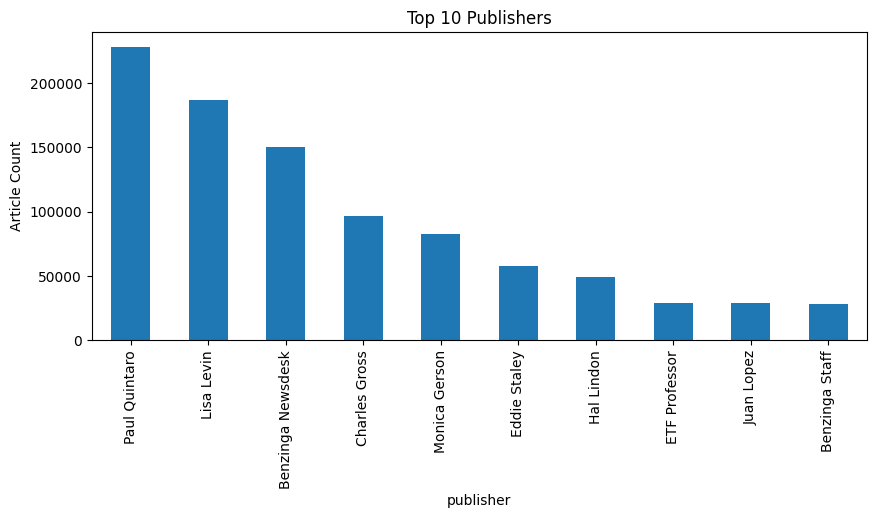

In [ ]:
# Most Active Publishers
publisher_counts = df["publisher"].value_counts().head(10)
publisher_counts.plot(kind='bar', title="Top 10 Publishers", ylabel="Article Count", figsize=(10, 4))


In [ ]:
# Domain Analysis: Extract domain names from email-style publisher fields
df["publisher_domain"] = df["publisher"].str.extract(r'@([\w\.-]+)')
top_domains = df["publisher_domain"].value_counts().head(5)

print("Top Publisher Domains:")
print(top_domains)


Top Publisher Domains:
publisher_domain
benzinga.com      7937
gmail.com          139
andyswan.com         5
investdiva.com       2
tothetick.com        2
Name: count, dtype: int64


Summary Metrics

In [ ]:
print("Total Records:", len(df))
print("Unique Publishers:", df['publisher'].nunique())
print("Headline Sentiment Sample:", df[['headline', 'sentiment']].head())


Total Records: 1407328
Unique Publishers: 1034
Headline Sentiment Sample:                                             headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday        0.0
1         Stocks That Hit 52-Week Highs On Wednesday        0.0
2                      71 Biggest Movers From Friday        0.0
3       46 Stocks Moving In Friday's Mid-Day Session        0.0
4  B of A Securities Maintains Neutral on Agilent...        0.0


# Load Stock Price Data (from local CSV)

In [ ]:
import pandas as pd

# Load AAPL historical data from your local directory
aapl_path = r"E:\Tenx\Week 1\Data\yfinance_data\AAPL_historical_data.csv"
df_2 = pd.read_csv(aapl_path, parse_dates=["Date"])

# Set Date as the index
df_2.set_index("Date", inplace=True)

# Preview the data
print(df_2.head())


                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  
Date                                 
1980-12-12        0.0           0.0  
1980-12-15        0.0           0.0  
1980-12-16        0.0           0.0  
1980-12-17        0.0           0.0  
1980-12-18        0.0           0.0  


### ***Calculate Technical Indicators with TA-Lib***


In [ ]:

import talib

# Calculate RSI (Relative Strength Index)
df_2["RSI"] = talib.RSI(df_2["Close"], timeperiod=14)

# Calculate SMA (Simple Moving Average)
df_2["SMA_20"] = talib.SMA(df_2["Close"], timeperiod=20)

# Calculate MACD
df_2["MACD"], df_2["MACD_signal"], df_2["MACD_Hist"] = talib.MACD(df_2["Close"], fastperiod=12, slowperiod=26, signalperiod=9)

# Optional: check the last few rows
df_2.tail()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,RSI,SMA_20,MACD,MACD_Signal,MACD_Hist,MACD_signal
Date,,,,,,,,,,,,,,
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,48.687742,224.228500,4.662717,6.678882,-2.016164,6.678882
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,47.386437,224.440500,3.748082,6.092722,-2.344640,6.092722
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,48.055700,224.633500,3.026267,5.479431,-2.453164,5.479431
2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,48.476184,225.014500,2.448591,4.873263,-2.424672,4.873263
2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800,0.0,0.0,49.359115,225.117001,2.012764,4.301163,-2.288399,4.301163


## Visualization the Trends ...using different plots
** for AAPL_historical_data ***

Scripts folder path: e:\Tenx\Week 1\Project\news_sentiment_stock\scripts


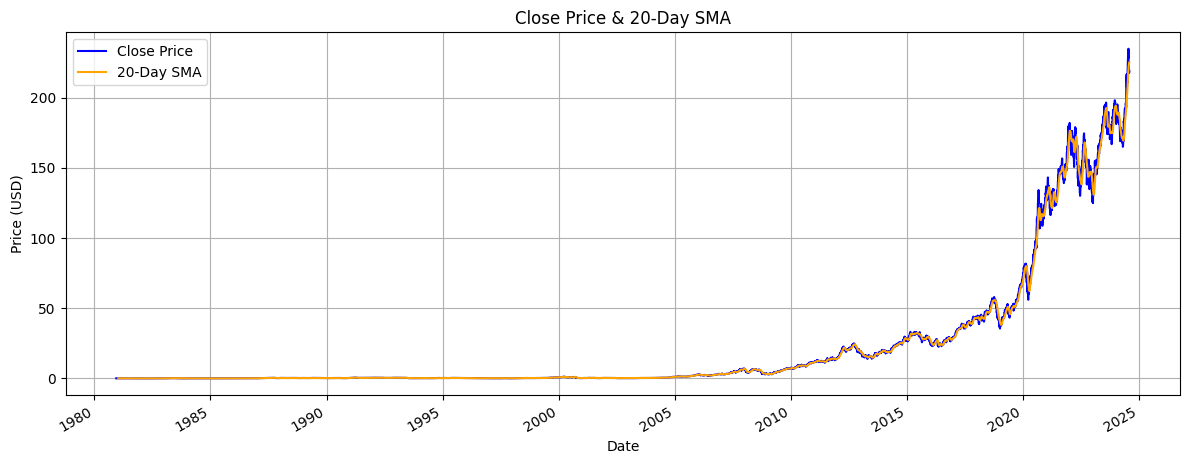

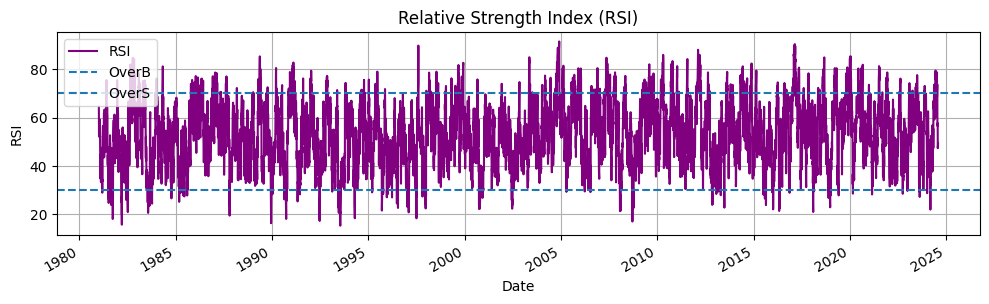

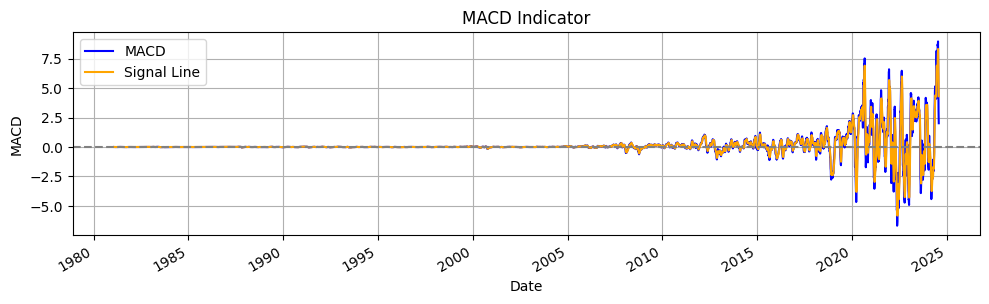

In [ ]:

import sys
import os

# Add the parent directory of 'notebook' (which is the root) to sys.path
# sys.path.append(os.path.abspath(".."))

scripts_path = os.path.abspath("../scripts")
print("Scripts folder path:", scripts_path)

if scripts_path not in sys.path:
    sys.path.insert(0, scripts_path)

from data_visualization import Visualizer


# df_2 is a dataframe for AAPL_historical_data
viz = Visualizer(df_2)

viz.plot_close_with_sma()
viz.plot_rsi()
viz.plot_macd()


In [ ]:
'''

import pandas as pd
from dateutil import parser
import pytz

# Load CSV file
df = pd.read_csv("E:/Tenx/Week 1/Data/raw_analyst_ratings.csv")


# Define timezone (change this if your timezone is not UTC-4)
eastern = pytz.timezone("America/New_York")  # corresponds to UTC-4 (with DST)

# Function to parse and convert datetime
def convert_to_iso8601(dt_str):
    try:
        # Parse date using dateutil (handles many formats)
        dt = parser.parse(dt_str)
        # Localize to UTC-4 (if not timezone-aware)
        if dt.tzinfo is None:
            dt = eastern.localize(dt)
        return dt.isoformat()
    except Exception:
        return dt_str  # return original if parsing fails

# Apply the conversion to the relevant column(s)
# Replace 'your_datetime_column' with your actual column name
df['date_parced'] = df['date'].astype(str).apply(convert_to_iso8601)

# Save the updated CSV
df.to_csv("E:/Tenx/Week 1/Data/new.csv", index=False)

'''
